<a href="https://colab.research.google.com/github/reseenamolna/Depression-Detection/blob/main/Machine_Learning_Techs_Depression_detection_applying_formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ftfy 
import warnings
warnings.filterwarnings("ignore")
import ftfy
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re

from math import exp
from numpy import sign

from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from nltk import PorterStemmer

from keras.layers import Bidirectional, GlobalMaxPool1D


from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, MaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

     |████████████████████████████████| 71kB 3.3MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45613 sha256=f1302b48e5303cfd15dfe94d7bd73faadc54c4772738d32bf59e41792a9e92b9
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
Successfully built ftfy


In [ ]:
import io

In [ ]:
import io

from google.colab import files
uploaded = files.upload()

Saving only depressed tweets with details and label.csv to only depressed tweets with details and label.csv


In [ ]:
depressive_tweets_df = pd.read_csv(io.BytesIO(uploaded['only depressed tweets with details and label.csv']))



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving random tweets with senti polarity.csv to random tweets with senti polarity.csv


In [ ]:
random_tweets_df= pd.read_csv(io.BytesIO(uploaded['random tweets with senti polarity.csv']))
#depressive_tweets_df = pd.read_csv(DEPRESSIVE_TWEETS_CSV, usecols = range(0,12))
#random_tweets_df = pd.read_csv(RANDOM_TWEETS_CSV, encoding = "ISO-8859-1", usecols = range(0,4))

In [ ]:
depressive_tweets_df.head()
#depressive_tweets_df.shape

,id,time,user_id,username,name,place,tweet,label
0,"12,92,07,10,93,99,86,20,000.00",23:32:45,"3,01,82,20,595.00",tizzleminizzle,theeheez,NaN,numa semana emagreci tipo 3kg and that’s on an...,1
1,"12,92,07,10,50,73,01,80,000.00",23:32:45,"12,02,44,67,84,80,04,10,000.00",t_voidz,The Voidz Lyrics,NaN,FUCK DEPRESSION,1
2,"12,92,07,10,19,08,00,40,000.00",23:32:45,"61,01,36,339.00",_hazzy,mark,NaN,Day 29 of the 30 day 25 press-ups challenge ra...,1
3,"12,92,07,09,70,14,92,90,000.00",23:32:45,"9,51,37,92,75,76,41,09,000.00",7illwaitforu7,ما عندي سالفة 🍒🌈,NaN,Depression: ↗️↗️↗️↗️,1
4,"12,92,07,09,55,43,96,70,000.00",23:32:45,"12,21,02,50,23,38,67,40,000.00",piyushmudgil4,Piyush Mudgil,NaN,बाकी वह सब हुआ जो तूने सोचा नहीं\nFeel Karke p...,1


In [ ]:
random_tweets_df.head()

#random_tweets_df.shape

,id,time,user_id,username,name,place,tweet,label
0,"""1190403946797576192""",23:03:12,"""3365929053""",PBWF2013,ryl5858,PA,RT @AlleghenyGreens: There are concerning carc...,0.0
1,"""1190401463564017671""",22:53:20,"""1062623885147877377""",Pittsburgh Injury Lawyers,pittinjurylaw,"Pittsburgh, PA",Legislators pitch a bill to rescue Pennsylvani...,1.0
2,"""1190394495252226049""",22:25:38,"""394788738""",Helen Gerhardt,Helen_Gerhardt,Pittsburgh,RT @IlhanMN: This is the result of putting pro...,0.0
3,"""1190390224515424257""",22:08:40,"""31946907""",Doug Gehrlein,Dan_Kenergy,"Erie, PA",RT @IlhanMN: This is the result of putting pro...,0.0
4,"""1190389521902395392""",22:05:53,"""3173316394""",Bradley Foster,Brad_E_Foster,"Pittsburgh, PA",A perspective on why the prompt month NYMEX #n...,1.0


In [ ]:
print(depressive_tweets_df['time'])






0       24:14:35
1       24:14:35
2       24:14:35
3       24:14:35
4       24:14:35
          ...   
4242    24:32:41
4243    24:32:41
4244    24:32:41
4245    24:32:41
4246    24:32:41
Name: time, Length: 4247, dtype: object


In [ ]:
!pip install -U textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)


In [ ]:
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)




In [ ]:
def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        # if url links then dont append to avoid news articles
        # also check tweet length, save those > 10 (length of word "depression")
        if re.match("(\w+:\/\/\S+)", tweet) == None and len(tweet) > 10:
            #remove hashtag, @mention, emoji and image URLs
            tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", tweet).split())
            
            #fix weirdly encoded texts
            tweet = ftfy.fix_text(tweet)
            
            #expand contraction
            tweet = expandContractions(tweet)

            #remove punctuation
            tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

            #stop words
            stop_words = set(stopwords.words('english'))
            word_tokens = nltk.word_tokenize(tweet) 
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            tweet = ' '.join(filtered_sentence)

            #stemming words
            tweet = PorterStemmer().stem(tweet)
            
            cleaned_tweets.append(tweet)

    return cleaned_tweets

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from textblob import TextBlob
def insomnia_count(target, pos_count, neg_count):
    #hour = target['time'].hour
    # positive count for tweets from 9pm - 6am
    if target > 6 and target < 21:
        neg_count += 1
    else:
        pos_count += 1
    return pos_count, neg_count

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment


#def avg_sentiment(statuses):
#    avg = 0
#    for status in statuses:
#        blob = TextBlob(status)
#        sentiment = blob.sentiment.polarity
#        avg += sentiment
#    avg_sentiment = avg / len(statuses)
#    return avg_sentiment

def first_person(statuses):
    count = 0
    first_person = ["i", "id", "ill", "im", "ive", "me", "my"]
    for status in statuses:
        #text = status.split()
        for word in first_person:
            #print(status.count(word))
            count += status.count(word)   
    if count==0:
      return 0
    else:
      return count / len(statuses)

def absolutist_terms(statuses):
    absolutist_terms = ["absolutely", "all", "always", "complete", "completely", "constant", "constantly", "definitely", "entire", "ever", "every", "everyone", "everything", "full", "must", "never", "nothing", "totally", "whole"]
    count = 0
    
    for status in statuses:
        for term in absolutist_terms:
            count += status.count(term)
    if count==0:
      return 0
    else:
      return count / len(statuses)



def tsugawa_terms(statuses):
    tsugawa_terms = ["depression","sad","unemployment","even if", "low fever", "very", "workplace", "hopeless", "disappear", "too much", "sickness", "bad", "hospital", "anxiety", "severe", "suicidal", "nausea", "drowsiness", "fatigue", "nervousness", "addictive", "attacks", "episodes", "sleep", "tolerance", "cope", "care"]
    count = 0
    count_per_tweet = 0
    for status in statuses:
        for term in tsugawa_terms:
            count += status.count(term)
    if count==0:
      return 0
    else:
      return count / len(statuses)

#def retweet_count(target, retweet_count):
#    retweet_count += int(target['retweet_count'])
#    return retweet_count

#def url_count(target, url_count):
#    url_count += len(target['entities']['urls'])
#    return url_count

def num_word_char(statuses):
    num_char = 0
    num_words = 0
    for status in statuses:
        num_words += len(status.split())
        num_char += len(status)
    
    num_words = num_words / len(statuses)
    num_char = num_char / len(statuses)
    return num_words, num_char

#def usertags(target, usertags, set_usertags):
#    user_mentions = target['entities']['user_mentions']
#    for user in user_mentions:
#        set_usertags.add(user['screen_name'])

#    usertags += len(user_mentions)
#    return usertags, set_usertags


In [ ]:
print(df['tweet'].isna().sum())
#df['time']

0


In [ ]:
def insomnia1_count (h):
    if h >6 and h<21:
      return 1
    else:
      return 0
def insomnia2_count (h):
    #print(h)
    if (((h >=21) and (h<=24)) or ((h>=0) and (h<=6))):
      return 1
    else:
      return 0


In [ ]:
df1 = pd.concat([depressive_tweets_df,random_tweets_df]) # merge the dataset on normal tweets and depressive tweets
tweets_arr = [x for x in df1['tweet']]
X_d = clean_tweets(tweets_arr)
X=pd.DataFrame(X_d)
df1['tweet']=X

df1['time'] = pd.to_datetime(df1['time'])
df1['hour'] = df1['time'].dt.hour



df1['pos_count1'] = df1.apply(lambda x: insomnia1_count(x['hour']), axis=1)
df1['neg_count1'] = df1.apply(lambda x: insomnia2_count(x['hour']), axis=1)

df1['sentiment_score']=df1.apply(lambda x:get_sentiment(x['tweet']),axis=1)
df1['absolute_count']=df1.apply(lambda x:absolutist_terms(x['tweet']),axis=1)
df1['tsugawa_count']=df1.apply(lambda x:tsugawa_terms(x['tweet']),axis=1)
df1['firstperson_count']=df1.apply(lambda x:first_person(x['tweet']),axis=1)




In [ ]:
def normalize_fpc (f):
    nfpc=(((f-0)/(0.190476-0))*(1.0-0))+0
    return nfpc
df1['norm_fpc']=df1.apply(lambda x:normalize_fpc(x['firstperson_count']),axis=1)

df1.max()

id                                      12,92,07,10,93,99,86,20,000.00
time                                               2021-01-16 23:59:40
user_id                                              Pennsylvania, USA
username             ๐กNews, Politics and Screaming into the Void...
name                                                              🧞‍♂️
tweet                zum gl ck hast du die aber momentan klingt das...
label                                                                1
hour                                                                23
pos_count1                                                           1
neg_count1                                                           1
sentiment_score                                                      1
absolute_count                                                       0
tsugawa_count                                                        0
firstperson_count                                             0.190476
norm_f

In [ ]:






df1.head()
df1.columns
df1['sentiment_score']

0     -0.066667
1     -0.233333
2      0.000000
3     -0.066667
4      0.000000
         ...   
993    0.300000
994    0.018056
995    0.200000
996    0.050000
997    0.000000
Name: sentiment_score, Length: 5245, dtype: float64

In [ ]:
#def calculate (f):
#    if(f['pos_count1']==1):
#      p=0.20
#    else:
#      p=-0.20
#    a = p+ f['sentiment_score']+f['absolute_count']+f['firstperson_count']+f['tsugawa_count']
#    return a 
def calculate (f):
    if(f['pos_count1']==1):
      p=1
    else:
      p=0
    v = (1*p+ 1*f['norm_fpc'])/2
    a= f['sentiment_score']*10*exp(v)
    return a
#a=df1
df1['depression_ratevalue']=df1.apply(lambda x:calculate(x),axis=1)


In [ ]:

def normalize_depressionratevalue (f):
    ndrv=(((f-(-40.1039))/(39.1394-(-40.1039)))*(3-0))+0.0
    return ndrv
df1['norm_drv']=df1.apply(lambda x:normalize_depressionratevalue(x['depression_ratevalue']),axis=1)


In [ ]:
df1.columns
r_d=df1.loc[df1['norm_drv'] <0]
r_d 
r_d['norm_drv']
#df1['norm_drv'].min()
df1.norm_drv.value_counts()

1.518257    1628
1.493018      75
1.552787      25
1.452762      14
1.476645      12
            ... 
1.430704       1
1.559235       1
1.553637       1
1.069813       1
1.483156       1
Name: norm_drv, Length: 2165, dtype: int64

In [ ]:
#def calculate (f):
#    if(f['norm_drv']< 1):
#      X="High"
#    elif(f['norm_drv']< 2):
#      X="Medium"
#    elif(f['norm_drv']< 3):
#      X="Low"
#    else:
#      X="Not Depressed"
#    return X 
def calculate (f):
  if(f['norm_drv']<= 1.5):
    X="Depressed"
  elif(f['norm_drv']<=3):
      X="Not Depressed"
  return X 

#a=df1
df1['depression_rate']=df1.apply(lambda x:calculate(x),axis=1)


In [ ]:
df1.depression_rate.value_counts()


Not Depressed    3778
Depressed        1467
Name: depression_rate, dtype: int64

In [ ]:
df1.head() 

,id,time,user_id,username,name,place,tweet,label,hour,pos_count1,neg_count1,sentiment_score,absolute_count,tsugawa_count,firstperson_count,norm_fpc,depression_ratevalue,norm_drv,depression_rate
0,"12,92,07,10,93,99,86,20,000.00",2021-01-08 23:32:45,"3,01,82,20,595.00",tizzleminizzle,theeheez,NaN,numa semana emagreci tipo 3kg anxiety depress,1.0,23,0,1,-0.066667,0,0,0.066667,0.350000,-0.946045,1.482442,Medium
1,"12,92,07,10,50,73,01,80,000.00",2021-01-08 23:32:45,"12,02,44,67,84,80,04,10,000.00",t_voidz,The Voidz Lyrics,NaN,fuck depress,1.0,23,0,1,-0.233333,0,0,0.000000,0.000000,-2.333333,1.429922,Medium
2,"12,92,07,10,19,08,00,40,000.00",2021-01-08 23:32:45,"61,01,36,339.00",_hazzy,mark,NaN,day 29 30 day 25 press ups challenge raising a...,1.0,23,0,1,0.000000,0,0,0.065934,0.346154,0.000000,1.518257,Medium
3,"12,92,07,09,70,14,92,90,000.00",2021-01-08 23:32:45,"9,51,37,92,75,76,41,09,000.00",7illwaitforu7,ما عندي سالفة 🍒🌈,NaN,depress,1.0,23,0,1,-0.066667,0,0,0.000000,0.000000,-0.666667,1.493018,Medium
4,"12,92,07,09,55,43,96,70,000.00",2021-01-08 23:32:45,"12,21,02,50,23,38,67,40,000.00",piyushmudgil4,Piyush Mudgil,NaN,feel karke padho read thoughts https www yourq...,1.0,23,0,1,0.000000,0,0,0.027972,0.146853,0.000000,1.518257,Medium


In [ ]:

df1.depression_rate.value_counts()

Not Depressed    3744
Depressed        1501
Name: depression_rate, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

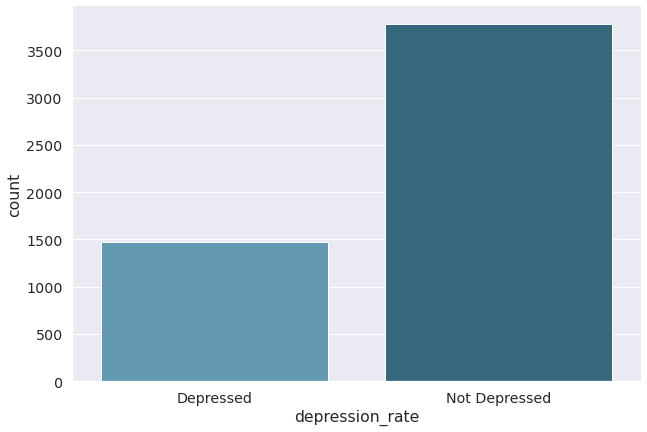

Not Depressed    3778
Depressed        1467
Name: depression_rate, dtype: int64

In [ ]:
sns.factorplot(x="depression_rate", data=df1, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();




df1.depression_rate.value_counts()

In [ ]:
from wordcloud import WordCloud 

In [ ]:
#r_d=df1.loc[df1['norm_drv'] <0]
df2=df1.loc[df1['depression_rate']=="Depressed"]
tweets_arr = [x for x in df2['tweet']]
X_d = clean_tweets(tweets_arr)

depressive_words = ' '.join(list(map(str, X_d)))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)


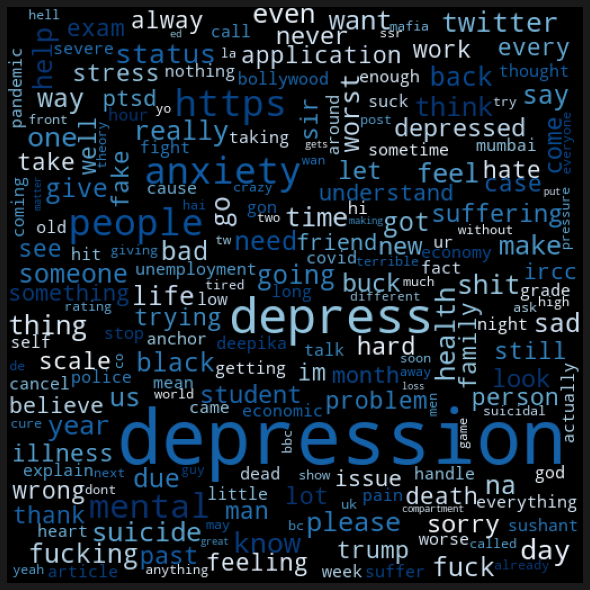

In [ ]:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
df2=df1.loc[df1['depression_rate']=="Not Depressed"]
tweets_arr = [x for x in df2['tweet']]
X_d = clean_tweets(tweets_arr)



In [ ]:
nondepressive_words = ' '.join(list(map(str, X_d)))
nondepressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Reds").generate(nondepressive_words)


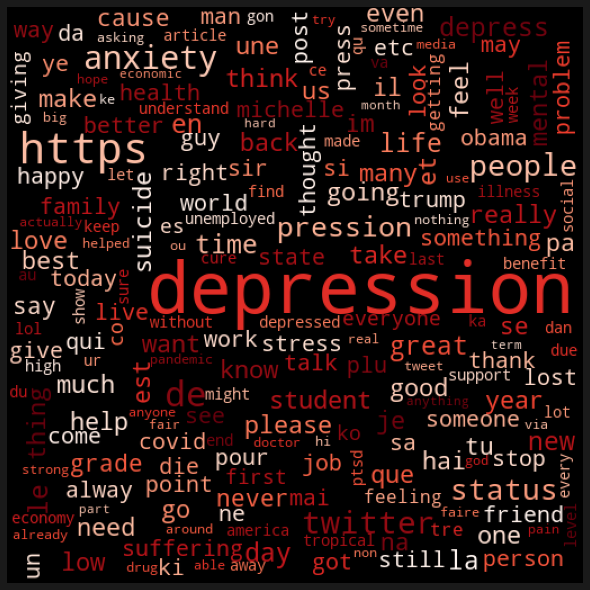

In [ ]:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(nondepressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
df1['final label'] = df1.depression_rate.map({'Depressed':1,'Not Depressed':0 })
df1.columns

Index(['id', 'time', 'user_id', 'username', 'name', 'place', 'tweet', 'label',
       'hour', 'pos_count1', 'neg_count1', 'sentiment_score', 'absolute_count',
       'tsugawa_count', 'firstperson_count', 'norm_fpc',
       'depression_ratevalue', 'norm_drv', 'depression_rate', 'final label'],
      dtype='object')

In [ ]:
df1['hour']

0      23
1      23
2      23
3      23
4      23
       ..
993    13
994    13
995    13
996    11
997     9
Name: hour, Length: 5245, dtype: int64

In [ ]:
df1=df1[df1['hour'].notna()]
df1=df1[df1['place'].notna()]

df1.columns

Index(['id', 'time', 'user_id', 'username', 'name', 'place', 'tweet', 'label',
       'hour', 'pos_count1', 'neg_count1', 'sentiment_score', 'absolute_count',
       'tsugawa_count', 'firstperson_count', 'norm_fpc',
       'depression_ratevalue', 'norm_drv', 'depression_rate', 'final label'],
      dtype='object')

In [ ]:
def tweet(X):
    return X.tweet.values

def place(X):
    return X.place.values

pipe_tweet = Pipeline([('col_tweet', FunctionTransformer(tweet, validate=False))])

pipe_title = Pipeline([('place', FunctionTransformer(place, validate=False))])


NameError: ignored

In [ ]:
X=df1['tweet']
#X=df1[['tweet','place','hour']]
#X = df1['user_id','place','tweet','hour']
y=df1['final label']
print(X)


408                          wow even rich suffer depress
1067    trump serious threat american lives american f...
0           numa semana emagreci tipo 3kg anxiety depress
1                                            fuck depress
2       day 29 30 day 25 press ups challenge raising a...
                              ...                        
993     pro gamer move get depression fun childhood te...
994     been battling depression extremely hard lately...
995     retweet really needs see message today https s...
996     susan needs thorough interrogation released de...
997     opens low grade depression podcast norris stor...
Name: tweet, Length: 997, dtype: object


In [ ]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)
y_train.shape


(797,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english',ngram_range=(1,1),max_features=1200).fit(X_train)


In [ ]:
#vect.fit(X_train)
#vect.vocabulary_
df_train=pd.DataFrame(vect.transform(X_train).todense())
df_test=pd.DataFrame(vect.transform(X_test).todense())
#column=vect.get_feature_names())
df_train.shape
df_test.shape
y_test.shape

(200,)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression



In [ ]:
lr=LogisticRegression()
lr.fit(df_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(df_test,y_test)

0.78

In [ ]:
X_place=df1['place']
X_placetrain, X_placetest, y_train, y_test = train_test_split(X_place, y, test_size = 0.20, random_state = 82)
X_train.shape

(797,)

In [ ]:
X_placetrain=pd.DataFrame(vect.transform(X_placetrain).todense())
X_placetest=pd.DataFrame(vect.transform(X_placetest).todense())
#column=vect.get_feature_names())
X_placetrain.shape

#y_test.shape

(797, 1200)

In [ ]:
X_ftrain=pd.concat([df_train,X_placetrain],axis=1)
X_ftest=pd.concat([df_test,X_placetest],axis=1)
X_ftrain.shape
X_ftest.shape

(200, 2400)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_ftrain,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(X_ftest,y_test)

0.78

In [ ]:
X_hour=df1['hour']
X_hourtrain, X_hourtest, y_train, y_test = train_test_split(X_hour, y, test_size = 0.20, random_state = 82)
X_hourtrain.shape

(797,)

In [ ]:
X_ftrain1=pd.concat([X_ftrain,X_hourtrain],axis=1)
X_ftest1=pd.concat([X_ftest,X_hourtest],axis=1)
X_ftrain1.shape
X_ftest1.shape

ValueError: ignored

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score()

In [ ]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear', random_state = 1)
svcclassifier.fit(X_ftrain, y_train)

ValueError: ignored

In [ ]:
y_pred = svcclassifier.predict(X_test_transformed)
print(y_pred)

[0 1 0 ... 1 0 0]


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
#metrics.accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
#sklearn.metrics.accuracy_score(y_test, y_pred,  normalize=True)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       767
           1       0.83      0.80      0.82       282

    accuracy                           0.90      1049
   macro avg       0.88      0.87      0.88      1049
weighted avg       0.90      0.90      0.90      1049



In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[721  46]
 [ 55 227]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       767
           1       0.83      0.80      0.82       282

    accuracy                           0.90      1049
   macro avg       0.88      0.87      0.88      1049
weighted avg       0.90      0.90      0.90      1049

0.90371782650143


In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[721  46]
 [ 55 227]]


In [ ]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8049645390070922


In [ ]:
specificity = TN / float(TN + FP)

print("specificity",specificity)
precision = TP / float(TP + FP)

print("precision",precision)

specificity 0.940026075619296
precision 0.8315018315018315


In [ ]:
print("precision",precision)
#print("PRECISION SCORE :", metrics.precision_score(y_test, y_pred))
#print("RECALL SCORE :", metrics.recall_score(y_test, y_pred))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred))

precision 0.8315018315018315
F1 SCORE : 0.818018018018018


In [ ]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred))

precision 0.8315018315018315
PRECISION SCORE : 0.8315018315018315
RECALL SCORE : 0.8049645390070922
F1 SCORE : 0.818018018018018


In [ ]:
tokenizer = Tokenizer(num_words=10000)

tokenizer.fit_on_texts(df1['tweet'])
print(df1['tweet'])



0          numa semana emagreci tipo 3kg anxiety depress
1                                           fuck depress
2      day 29 30 day 25 press ups challenge raising a...
3                                                depress
4      feel karke padho read thoughts https www yourq...
                             ...                        
993    pro gamer move get depression fun childhood te...
994    been battling depression extremely hard lately...
995    retweet really needs see message today https s...
996    susan needs thorough interrogation released de...
997    opens low grade depression podcast norris stor...
Name: tweet, Length: 5245, dtype: object


In [ ]:

df1.dropna(inplace=True)
sequences= tokenizer.texts_to_sequences(df1['tweet'])
#sequences_r = tokenizer.texts_to_sequences(X_r)
print(sequences)

[[1106, 36, 1190, 281, 5], [114, 808, 2165, 748, 453, 748, 9646, 2657, 685, 364, 120, 198, 3596, 272, 95, 1, 175, 154, 2926, 9647, 1935, 3943, 26, 2243, 784, 351, 26, 4170, 2099, 2774, 26, 9648], [5396, 5397, 5398, 5399, 5400, 6, 5], [168, 5], [33, 1994, 245, 33, 180, 109, 271, 712, 1336, 353, 563, 29, 1, 6, 144], [5], [34, 3931, 5401, 339, 303, 3, 43, 5402, 5403, 5404, 5405, 3079, 5406, 11, 5407, 1777, 856, 3080, 2631, 2216, 5408, 67, 3080, 5409, 5410], [970, 194, 653, 150, 145, 261, 76, 55, 81, 1, 104, 857, 181, 742, 1591, 26, 811, 1238, 1337, 3, 43, 1446, 4, 105, 151, 1035, 26, 150, 145, 857, 1, 3081, 1778, 430], [2217, 125, 24, 222, 1779, 370, 678, 1, 21, 5411, 252, 41, 564, 3082, 1239, 3, 9, 4, 1592, 10, 1593], [28, 5412, 431, 3083, 83, 1, 194, 100, 92, 5413, 2632, 5414, 5415, 5416], [397, 85, 292, 410, 1, 271, 5417, 812, 88, 70, 460, 604, 3084, 904, 292, 1780, 116, 1036, 1100, 2218, 371, 16, 1995, 131, 1, 654, 5418, 524], [201, 1037, 3085, 411, 5419, 90, 195, 229, 1, 3085, 411, 2

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 11559 unique tokens


In [ ]:
print(sequences)
data = pad_sequences(sequences, maxlen=140)

print(data)

[[1106, 36, 1190, 281, 5], [114, 808, 2165, 748, 453, 748, 9646, 2657, 685, 364, 120, 198, 3596, 272, 95, 1, 175, 154, 2926, 9647, 1935, 3943, 26, 2243, 784, 351, 26, 4170, 2099, 2774, 26, 9648], [5396, 5397, 5398, 5399, 5400, 6, 5], [168, 5], [33, 1994, 245, 33, 180, 109, 271, 712, 1336, 353, 563, 29, 1, 6, 144], [5], [34, 3931, 5401, 339, 303, 3, 43, 5402, 5403, 5404, 5405, 3079, 5406, 11, 5407, 1777, 856, 3080, 2631, 2216, 5408, 67, 3080, 5409, 5410], [970, 194, 653, 150, 145, 261, 76, 55, 81, 1, 104, 857, 181, 742, 1591, 26, 811, 1238, 1337, 3, 43, 1446, 4, 105, 151, 1035, 26, 150, 145, 857, 1, 3081, 1778, 430], [2217, 125, 24, 222, 1779, 370, 678, 1, 21, 5411, 252, 41, 564, 3082, 1239, 3, 9, 4, 1592, 10, 1593], [28, 5412, 431, 3083, 83, 1, 194, 100, 92, 5413, 2632, 5414, 5415, 5416], [397, 85, 292, 410, 1, 271, 5417, 812, 88, 70, 460, 604, 3084, 904, 292, 1780, 116, 1036, 1100, 2218, 371, 16, 1995, 131, 1, 654, 5418, 524], [201, 1037, 3085, 411, 5419, 90, 195, 229, 1, 3085, 411, 2

In [ ]:
!pip3 install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=0c7bac0dc581d115a714051b06c04f24a43e732ea3b61b15341b51140f06df49
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
google_news_path = "path\to\google\news\\GoogleNews-vectors-negative300.bin.gz"

In [ ]:
!pip3 install -U gensim

     |████████████████████████████████| 24.2MB 4.3MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-01-08 07:42:26--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.67.134
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.67.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  70.3MB/s    in 25s     

2021-01-08 07:42:51 (62.9 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [ ]:
nb_words = min(10000, len(word_index))

embedding_matrix = np.zeros((nb_words, 300))

for (word, idx) in word_index.items():
    if word in word2vec.vocab and idx < 10000:
        embedding_matrix[idx] = word2vec.word_vec(word)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
corpus = df1['tweet'].values.astype('U')
tfidf = TfidfVectorizer(max_features = 10000) 
tdidf_tensor = tfidf.fit_transform(corpus)

  (0, 2589)	0.15948983357075033
  (0, 908)	0.16995593395462133
  (0, 389)	0.4348972231461559
  (0, 8927)	0.4348972231461559
  (0, 3078)	0.4348972231461559
  (0, 7903)	0.4348972231461559
  (0, 6368)	0.4348972231461559
  (1, 3711)	0.8684431184684909
  (1, 2589)	0.4957888159133107
  (2, 7174)	0.24045030034262835
  (2, 2596)	0.058096937306004216
  (2, 8506)	0.19323219838011094
  (2, 5651)	0.286109729211671
  (2, 1148)	0.26901772041650635
  (2, 7291)	0.3268302232241165
  (2, 1825)	0.29680690960453726
  (2, 9326)	0.25828266722883925
  (2, 7031)	0.22673273766938296
  (2, 310)	0.2557417687484162
  (2, 348)	0.25828266722883925
  (2, 322)	0.34554162617135153
  (2, 2478)	0.3992151198134219
  (2, 908)	0.15272485947122502
  (3, 2589)	1.0
  (4, 1477)	0.21818248390604417
  :	:
  (5253, 2044)	0.11627807958752318
  (5253, 4420)	0.10545467763569076
  (5253, 2596)	0.047300806565516954
  (5254, 319)	0.23177950868564345
  (5254, 8306)	0.21280837316203624
  (5254, 1092)	0.20858933639743932
  (5254, 1788)	0.

In [ ]:
df.columns.tolist()

['id', 'time', 'user_id', 'username', 'name', 'place', 'tweet', 'label']

In [ ]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC,SVR
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
df1.columns

Index(['id', 'time', 'user_id', 'username', 'name', 'place', 'tweet', 'label',
       'hour', 'pos_count1', 'neg_count1', 'sentiment_score', 'absolute_count',
       'tsugawa_count', 'firstperson_count', 'depression_rate',
       'depression_ratevalue', 'depression_ratev'],
      dtype='object')

In [ ]:
df1['depression_ratev'] = df1.depression_rate.map({'High':3, 'Medium':2,'Low':1,'Not Depressed':0 })

In [ ]:
from sklearn.model_selection import train_test_split
df1['tweet']=tdidf_tensor
X=df1.iloc[:, [6]].values
#X = df1['tweet']
#X = df.drop('user_id',axis=1)
#X = df.drop('label',axis=1)
y = df1['depression_ratev']
print(X)

[[<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matri

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

ValueError: ignored

In [ ]:


x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
print(X)

[[<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matrix of type '<class 'numpy.float64'>'
	with 15871 stored elements in Compressed Sparse Row format>]
 [<991x5929 sparse matri

pandas.core.series.Series

In [ ]:

!pip install -U scikit-learn 


     |████████████████████████████████| 22.2MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn import svm, datasets

In [ ]:
x_train.shape

(693, 1)

In [ ]:

y_train.shape

(693,)

In [ ]:
#linear = svm.SVC(kernel='linear', C=1, 
#                 decision_function_shape='ovo').fit(x_train, y_train)
                 
baseline_model = SVC()
baseline_model.fit(x_train, y_train)

ValueError: ignored

In [ ]:
predictions = baseline_model.predict(x_test)

In [ ]:
accuracy_score(y_test, predictions)

0.6321070234113713

In [ ]:
print(classification_report(y_test, predictions, digits=5))

ValueError: ignored

In [ ]:
#EMBEDDING_FILE = os.path.join(data_dir, 'googles-trained-word2vec-model-in-python/GoogleNews-vectors-negative300.bin.gz')
//word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)
//word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [ ]:
DEPRES_NROWS = 4250  # number of rows to read from DEPRESSIVE_TWEETS_CSV
RANDOM_NROWS = 998 # number of rows to read from RANDOM_TWEETS_CSV
MAX_SEQUENCE_LENGTH = 140 # Max tweet size
MAX_NB_WORDS = 10000
EMBEDDING_DIM = 300
TRAIN_SPLIT = 0.6
TEST_SPLIT = 0.2
LEARNING_RATE = 0.1
EPOCHS= 10

In [ ]:
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((MAX_NB_WORDS, EMBEDDING_DIM))

In [ ]:
for (word, idx) in word_index.items():
    if word in word2vec.vocab and idx < MAX_NB_WORDS:
        embedding_matrix[idx] = word2vec.word_vec(word)



In [ ]:
MAX_SEQ_LENGTH = 140

In [ ]:
inp = Input(shape=(MAX_SEQ_LENGTH,))
x = Embedding(MAX_NB_WORDS, EMBEDDING_DIM, weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(100, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(1, activation="sigmoid")(x)

In [ ]:
# Compile the model
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:

X=tdidf_tensor
Y=df['label']
x_train, x_test, y_train, y_test = train_test_split(X, Y.values, test_size=0.3)

In [ ]:
#model.fit(x_train, y_train, batch_size=16, epochs=10)
#tdidf_tensor.sparse.reorder(x_train)
#tf.sparse.reorder(x_train,name=None)

#tdidf_tensor.sparse.reorder(x_train,name=None)

model.fit(x_train, y_train, validation_data = (x_test,y_test),epochs = 20,
          batch_size = 64, shuffle = True)



InvalidArgumentError: ignored

In [ ]:
X=df['tweet']
Y=df['label']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)


In [ ]:
X.shape

(5243,)

In [ ]:
Y.shape

(5243,)

In [ ]:
#x_train = x_train.transpose() 

In [ ]:
x_train.shape

(3670, 2)

In [ ]:
y_train.shape


(3670,)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
y_pred = nb.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.9294342021614749
              precision    recall  f1-score   support

         0.0    0.00000   0.00000   0.00000       111
         1.0    0.92943   1.00000   0.96343      1462

    accuracy                        0.92943      1573
   macro avg    0.46472   0.50000   0.48171      1573
weighted avg    0.86385   0.92943   0.89544      1573



In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(x_train, y_train)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [ ]:
y_pred = sgd.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.9294342021614749
              precision    recall  f1-score   support

         0.0    0.00000   0.00000   0.00000       111
         1.0    0.92943   1.00000   0.96343      1462

    accuracy                        0.92943      1573
   macro avg    0.46472   0.50000   0.48171      1573
weighted avg    0.86385   0.92943   0.89544      1573



In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(x_train, y_train)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [ ]:
y_pred = logreg.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=5))


accuracy 0.916083916083916
              precision    recall  f1-score   support

         0.0    0.39175   0.34234   0.36538       111
         1.0    0.95054   0.95964   0.95507      1462

    accuracy                        0.91608      1573
   macro avg    0.67115   0.65099   0.66023      1573
weighted avg    0.91111   0.91608   0.91346      1573



In [ ]:
labels_d = np.array([1] * DEPRES_NROWS)
labels_r = np.array([0] * RANDOM_NROWS)
print(labels_d)
print(labels_r)

[1 1 1 ... 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

In [ ]:
# Assigning labels to the depressive tweets and random tweets data
labels_d = np.array([1] * DEPRES_NROWS)
labels_r = np.array([0] * RANDOM_NROWS)

# Splitting the arrays into test (60%), validation (20%), and train data (20%)
perm_d = np.random.permutation(len(data_d))
idx_train_d = perm_d[:int(len(data_d)*(TRAIN_SPLIT))]
idx_test_d = perm_d[int(len(data_d)*(TRAIN_SPLIT)):int(len(data_d)*(TRAIN_SPLIT+TEST_SPLIT))]
idx_val_d = perm_d[int(len(data_d)*(TRAIN_SPLIT+TEST_SPLIT)):]

perm_r = np.random.permutation(len(data_r))
idx_train_r = perm_r[:int(len(data_r)*(TRAIN_SPLIT))]
idx_test_r = perm_r[int(len(data_r)*(TRAIN_SPLIT)):int(len(data_r)*(TRAIN_SPLIT+TEST_SPLIT))]
idx_val_r = perm_r[int(len(data_r)*(TRAIN_SPLIT+TEST_SPLIT)):]

# Combine depressive tweets and random tweets arrays
data_train = np.concatenate((data_d[idx_train_d], data_r[idx_train_r]))
labels_train = np.concatenate((labels_d[idx_train_d], labels_r[idx_train_r]))
data_test = np.concatenate((data_d[idx_test_d], data_r[idx_test_r]))
labels_test = np.concatenate((labels_d[idx_test_d], labels_r[idx_test_r]))
data_val = np.concatenate((data_d[idx_val_d], data_r[idx_val_r]))
labels_val = np.concatenate((labels_d[idx_val_d], labels_r[idx_val_r]))

# Shuffling
perm_train = np.random.permutation(len(data_train))
data_train = data_train[perm_train]
labels_train = labels_train[perm_train]
perm_test = np.random.permutation(len(data_test))
data_test = data_test[perm_test]
labels_test = labels_test[perm_test]
perm_val = np.random.permutation(len(data_val))
data_val = data_val[perm_val]
labels_val = labels_val[perm_val]


In [ ]:
model = Sequential()
# Embedded layer
model.add(Embedding(len(embedding_matrix), EMBEDDING_DIM, weights=[embedding_matrix], 
                            input_length=MAX_SEQUENCE_LENGTH, trainable=False))
# Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
# LSTM Layer
model.add(LSTM(300))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 140, 300)          3000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 140, 32)           28832     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 70, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 70, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 300)               399600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

hist = model.fit(data_train, labels_train, \
        validation_data=(data_val, labels_val), \
        epochs=EPOCHS, batch_size=40, shuffle=True, \
        callbacks=[early_stop])

Epoch 1/10
79/79 [==============================] - 25s 317ms/step - loss: 0.1662 - acc: 0.9357 - val_loss: 0.0645 - val_acc: 0.9837
Epoch 2/10
79/79 [==============================] - 25s 312ms/step - loss: 0.0305 - acc: 0.9914 - val_loss: 0.0253 - val_acc: 0.9866
Epoch 3/10
79/79 [==============================] - 25s 312ms/step - loss: 0.0216 - acc: 0.9942 - val_loss: 0.0176 - val_acc: 0.9952
Epoch 4/10
79/79 [==============================] - 25s 312ms/step - loss: 0.0139 - acc: 0.9981 - val_loss: 0.0160 - val_acc: 0.9962
Epoch 5/10
79/79 [==============================] - 25s 314ms/step - loss: 0.0133 - acc: 0.9974 - val_loss: 0.0221 - val_acc: 0.9933
Epoch 6/10
79/79 [==============================] - 25s 314ms/step - loss: 0.0066 - acc: 0.9987 - val_loss: 0.0113 - val_acc: 0.9962
Epoch 7/10
79/79 [==============================] - 25s 313ms/step - loss: 0.0047 - acc: 0.9994 - val_loss: 0.0132 - val_acc: 0.9962
Epoch 8/10
79/79 [==============================] - 25s 317ms/step - 

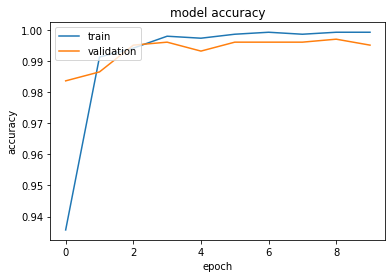

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

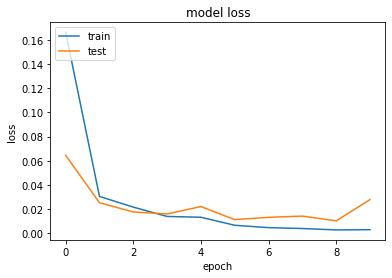

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
labels_pred = model.predict(data_test)
labels_pred = np.round(labels_pred.flatten())
accuracy = accuracy_score(labels_test, labels_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 99.62%


In [ ]:
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       198
           1       1.00      1.00      1.00       844

    accuracy                           1.00      1042
   macro avg       1.00      0.99      0.99      1042
weighted avg       1.00      1.00      1.00      1042



In [ ]:
class LogReg:
    """
    Class to represent a logistic regression model.
    """

    def __init__(self, l_rate, epochs, n_features):
        """
        Create a new model with certain parameters.

        :param l_rate: Initial learning rate for model.
        :param epoch: Number of epochs to train for.
        :param n_features: Number of features.
        """
        self.l_rate = l_rate
        self.epochs = epochs
        self.coef = [0.0] * n_features
        self.bias = 0.0

    def sigmoid(self, score, threshold=20.0):
        """
        Prevent overflow of exp by capping activation at 20.

        :param score: A real valued number to convert into a number between 0 and 1
        """
        if abs(score) > threshold:
            score = threshold * sign(score)
        activation = exp(score)
        return activation / (1.0 + activation)

    def predict(self, features):
        """
        Given an example's features and the coefficients, predicts the class.

        :param features: List of real valued features for a single training example.

        :return: Returns the predicted class (either 0 or 1).
        """
        value = sum([features[i]*self.coef[i] for i in range(len(features))]) + self.bias
        return self.sigmoid(value)

    def sg_update(self, features, label):
        """
        Computes the update to the weights based on a predicted example.

        :param features: Features to train on.
        :param label: Corresponding label for features.
        """
        yhat = self.predict(features)
        e = label - yhat
        self.bias = self.bias + self.l_rate * e * yhat * (1-yhat)
        for i in range(len(features)):
            self.coef[i] = self.coef[i] + self.l_rate * e * yhat * (1-yhat) * features[i]
        return

    def train(self, X, y):
        """
        Computes logistic regression coefficients using stochastic gradient descent.

        :param X: Features to train on.
        :param y: Corresponding label for each set of features.

        :return: Returns a list of model weight coefficients where coef[0] is the bias.
        """
        for epoch in range(self.epochs):
            for features, label in zip(X, y):
                self.sg_update(features, label)
        return self.bias, self.coef


def get_accuracy(y_bar, y_pred):
    
    correct = 0
    for i in range(len(y_bar)):
        if y_bar[i] == y_pred[i]:
            correct += 1
    accuracy = (correct / len(y_bar)) * 100.0
    return accuracy



In [ ]:
logreg = LogReg(LEARNING_RATE, EPOCHS, len(data_train[0]))
bias_logreg, weights_logreg = logreg.train(data_train, labels_train)
y_logistic = [round(logreg.predict(example)) for example in data_test]


In [ ]:
accuracy_logistic = get_accuracy(y_logistic, labels_test)
print('Logistic Regression Accuracy: {:0.3f}'.format(accuracy_logistic))

Logistic Regression Accuracy: 80.998
